In [1]:
# EE488C Special Topics in EE <Deep Learning and AlphaGo>, Fall 2016
# Information Theory & Machine Learning Lab, School of EE, KAIST
# Wonseok Jeon and Sungik Choi (wonsjeon@kaist.ac.kr, si_choi@kaist.ac.kr)
# written on 2016/11/23

import numpy as np
import time
import os
import matplotlib.pyplot as plt
from breakout_environment import environment1 as environment
from state_representation import scalar_state

It performs Q-learning to train an agent to play Breakout environment #1.

In [2]:
# First, set the parameters
num_rows = 5
num_columns = 5
num_states = 6**5
num_actions = 5
num_episodes = 10000
alpha = 0.1
gamma = 0.9
Q = np.zeros([num_states, num_actions])
num_trials = np.zeros([num_episodes])

* 𝜖−greedy exploration is used, where the value of 𝜖𝜖 is set to 1 for the first episode and then decreased linearly to 0 for the last episode.
* The number of episodes is set to 10,000. For the i-th episode, ‘num_trials[i]’ is set to the number of actions taken during the episode.
* At the end of training, it will show the number of actions taken for the last episode, i.e., ‘num_trials[n_episodes-1]’. Since 𝜖=0 for the last episode, it measures the performance of the learned agent without any random exploration. If training is done well, the number of actions taken for the last episode should be 5. Due to randomness, i.e., random explorations during training, this may be higher than 5 sometimes. In that case, try to run the code again until you get 5.

Number of time steps at the end of training:  5.0


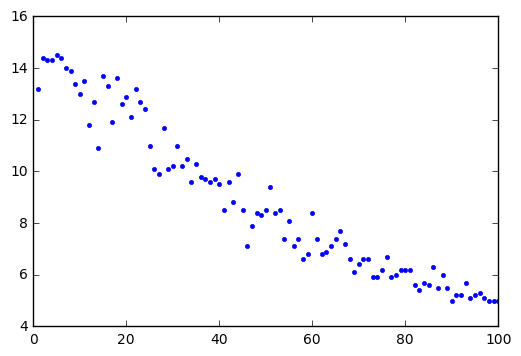

In [3]:
for i_episode in range(num_episodes):
    S = [5, 5, 5, 5, 5]; Ss = scalar_state(S)
    epsilon = 1.0 - float(i_episode) / float(num_episodes - 1)
    for epoch in range(10000):
        if np.random.random() < epsilon:  # random exploration with prob. epsilon
            A = int(np.random.randint(0, 5))
        else:  # greedy action with random tie break
            maxQ = np.max(Q[Ss]) 
            A = int(np.random.choice(np.argwhere(Q[Ss] == maxQ).flatten()))
        R, Sn, T = environment(S, A)  # Observe the outputs of the state transition
        Q[Ss, A] = (1 - alpha) * Q[Ss, A] + alpha * (
            R + gamma * np.max(Q[scalar_state(Sn)]))  # Perform Q learning
        if T == 1:  # If terminal state
            num_trials[i_episode] = epoch + 1
            break
        S = Sn
# Print the number of trials
print "Number of time steps at the end of training: ", num_trials[num_episodes - 1]
# Plot the average number of time steps 
# Each data point is an average over (num_episodes / 100) episodes
Xaxis = np.linspace(1, 100, 100, endpoint = True)
C = np.mean(np.reshape(num_trials, [100, num_episodes / 100]), axis = 1)
plt.plot(Xaxis, C, '.')
plt.show()

Above shows a plot of how the number of actions changes over training episodes. Each data point in the plot shows an average of ‘num_trials’ over (num_episodes / 100) episodes.